# 分析2001年至2018年，5~19歲人口數變化與劍湖山遊客數的變化

In [56]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

以下分析使用的數據包含:

population.csv:全國2001-2018的人口數統計

tourist.csv:劍湖山2001-2018遊客數統計

資料:https://drive.google.com/open?id=1y6W2LG2NHdBJ8EZmAQ5lcIrKzcB-aOQk

In [46]:
population = [line.strip('\n').split(',') for line in open('D://population.csv')] #取得歷年各年齡層人口數資料

In [47]:
population_arr = np.array(population)

In [48]:
population_arr

array([['年(月)底別', '總人口數', '0~4歲', '5~9歲', '10~14歲', '15~19歲', '20~24歲',
        '25~29歲', '30~34歲', '35~39歲', '40~44歲', '45~49歲', '50~54歲',
        '55~59歲', '60~64歲', '65~69歲', '70~74歲', '75~79歲', '80~84歲',
        '85~89歲', '90~94歲', '95~99歲', '100歲以上'],
       ['九十年 2001', '22405568', '1426759', '1618964', '1616161',
        '1768347', '1992372', '1828743', '1855510', '1946820', '1859355',
        '1678885', '1250525', '800735', '789035', '656027', '591347',
        '398637', '207848', '88205', '25222', '4948', '1123'],
       ['九十一年2002 ', '22520776', '1350829', '1621378', '1626685',
        '1681126', '2004871', '1856171', '1847353', '1913758', '1896052',
        '1706154', '1363730', '821946', '799423', '665502', '593675',
        '419184', '224363', '92436', '29336', '5506', '1298'],
       ['九十二年2003 ', '22604550', '1309903', '1561046', '1610671',
        '1646048', '1977231', '1901431', '1821029', '1891845', '1919263',
        '1744527', '1456435', '866063', '811324', '677189'

In [17]:
teenager = np.zeros([18,1]) #產生一個用來放置5~19歲人口數的資料夾

In [30]:
for i in range(1,19): #將5~19歲的人口數整合後放入teenager 
    teenager[i-1][0] = sum(population_arr[i][3:6].astype(np.int64))

In [31]:
teenager

array([[5003472.],
       [4929189.],
       [4817765.],
       [4735808.],
       [4704948.],
       [4661357.],
       [4598386.],
       [4484949.],
       [4394185.],
       [4268372.],
       [4157037.],
       [4043519.],
       [3916602.],
       [3789975.],
       [3635160.],
       [3513594.],
       [3427546.],
       [3357513.]])

In [32]:
tourist = [line.strip('\n').split(',') for line in open('D://tourist.csv')] #歷年遊客數資料

In [34]:
tourist_arr = np.array(tourist)

In [38]:
touristnumber = tourist_arr[1:,1].astype(np.int64) #取出特定行並轉成數值型態

In [39]:
touristnumber

array([1671898, 1775017, 2055149, 1960227, 1441298, 1407364, 1253291,
       1237413, 1133176, 1272558, 1284988, 1154586, 1120235, 1121634,
       1123954, 1000515, 1000647,  927462], dtype=int64)

In [40]:
Touristnumber= touristnumber.reshape(len(touristnumber),1)

In [43]:
Touristnumber

array([[1671898],
       [1775017],
       [2055149],
       [1960227],
       [1441298],
       [1407364],
       [1253291],
       [1237413],
       [1133176],
       [1272558],
       [1284988],
       [1154586],
       [1120235],
       [1121634],
       [1123954],
       [1000515],
       [1000647],
       [ 927462]], dtype=int64)

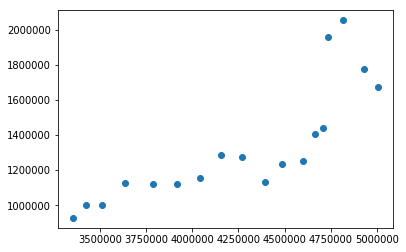

In [44]:
plt.scatter(teenager,Touristnumber) #將兩資料簡單作圖

因為資料量較少 取0.3的資料測驗 0.7的資料回歸

In [71]:
x_train,x_test,y_train,y_test = train_test_split(teenager,Touristnumber,test_size=0.3,random_state=1324)

In [72]:
regr = LinearRegression()

In [73]:
regr.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [74]:
Y_pred = regr.predict(x_test)

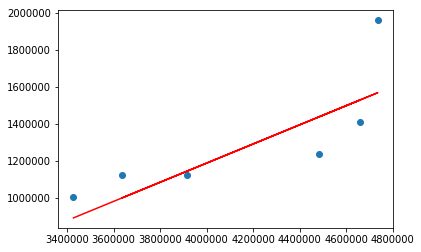

In [75]:
plt.scatter(x_test,y_test)
plt.plot(x_test,Y_pred,'r')

從結果可以得知，劍湖山遊客人數與5~19歲青少年人數在千禧年後呈現正相關，也因為近年來此範圍人口數逐漸下降，劍湖山遊客數有逐漸下降的趨勢